In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib import rc

from src.edmd_1d import *

In [2]:
"""Run simulation for specific initial conditions of four hard-disks."""
N = 10
sigma = 0.1
L = 40
e = 0.2

dt = 0
n_steps = int(100)

Initial kinetic energy is  [835.4720871]
Final kinetic energy is  [7.99202159e-21]


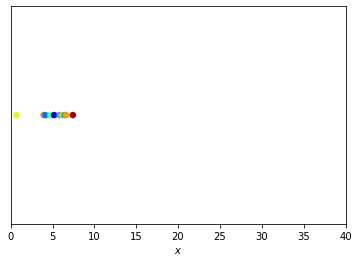

In [3]:
x_i, v_i = generate_particles(N, sigma, L, d=1)  # randomly initialise particles
E_i = sum(v_i[i]**2 for i in range(N))
print('Initial kinetic energy is ', E_i)
x_f, v_f = ed_simulation(x_i, v_i, n_steps, sigma, N, L, 
                         restitution_coefficient=e)
E_f = sum(v_f[i]**2 for i in range(N))
print('Final kinetic energy is ', E_f)

e_eff = math.sqrt(E_f/E_i)

snapshot_beads(x_f, N, sigma, np.random.rand(N), L=L)

In [4]:
n_steps = int(10000)

num_e = 20
N_max = 70
es = np.linspace(0.1, 0.99, num_e)
e_effs = np.zeros((num_e, N_max-1))
locs = np.zeros((num_e, N_max-1))

for i, e in enumerate(tqdm(es)):
    for j, N in enumerate(range(1, N_max)):
        x_i, v_i = generate_particles(N, sigma, L, d=1)  # randomly initialise particles
        t_wall_slowest = abs(L/min(v_i.values())[0])
        
        E_i = sum(v_i[i]**2 for i in range(N))
        #print('Initial kinetic energy is ', E_i)
        x_f, v_f = ed_simulation(x_i, v_i, n_steps, sigma, N, L, 
                                 restitution_coefficient=e, t_max=t_wall_slowest)
        E_f = sum(v_f[i]**2 for i in range(N))
        #print('Final kinetic energy is ', E_f)

        e_effs[i, j] = math.sqrt(E_f/E_i)


  0%|          | 0/20 [00:00<?, ?it/s]

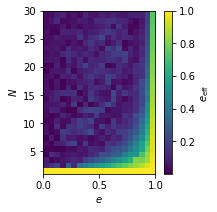

In [5]:
rc('font', size=10)
rc('axes', labelsize=10)

fig, ax = plt.subplots(figsize=(3,3))

p = ax.imshow(e_effs.transpose(), extent=[0.0, 1, N_max-1, 1])
ax.set_xlabel(r"$e$")
ax.set_ylabel(r"$N$")
ax.set_aspect(0.05)
ax.set_ylim([1, 30])
plt.colorbar(p, label=r"$e_{\rm eff}$")
plt.savefig('phase_diagram.pdf', bbox_inches = 'tight')